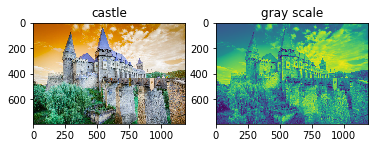

In [13]:
## Object detection
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
shape=cv2.imread('castle.jpg',cv2.IMREAD_COLOR)
#waldosPic=cv2.imread('sunflowersPic.jpg',0)
gray_shape=cv2.cvtColor(shape,cv2.COLOR_BGR2GRAY)


fig=plt.figure()


# subplot 1
a=fig.add_subplot(1,2,1)
plt.imshow(shape,cmap='nipy_spectral')
a.set_title("castle")

#subplot 2

a=fig.add_subplot(1,2,2)
plt.imshow(gray_shape)
a.set_title("gray scale")
#fig=plt.figure(figsize=(100,100),dpi=80,facecolor='w',edgecolor='k')
plt.show()

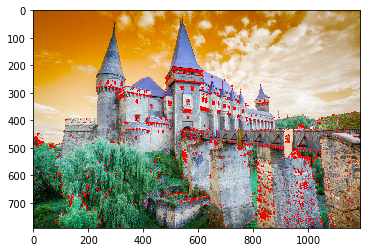

In [37]:
# Harrison corners
gray_shape=np.float32(gray_shape)
har_cor=cv2.cornerHarris(gray_shape,3,3,0.01)
kernel=np.ones((3,3),np.uint8)
har_cor=cv2.dilate(har_cor,kernel,iterations=1)
shape[har_cor>0.03*har_cor.max()]=[255,0,0]
plt.imshow(shape)

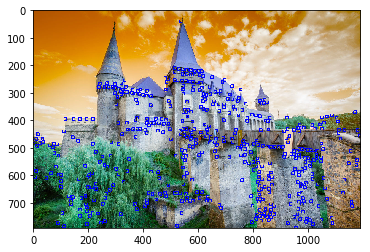

In [35]:
gray=gray_shape
good_feature_corners=cv2.goodFeaturesToTrack(gray,500,0.02,10)
for i in good_feature_corners:
    x,y=i[0]
    cv2.rectangle(shape,(int(x-5),int(y-5)),(int(x+5),int(y+5)),(0,0,255),2)
plt.imshow(shape) 

In [47]:
orb=cv2.ORB_create(5000)
key=orb.detect(gray_shape,None)
key,desc=orb.compute(gray_shape,key)
image=cv2.drawKeypoints(shape,key,cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imshow("orb detection",image)
cv2.waitKey()


-1

In [1]:
## Object detection
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def orb_detector(image,template):
    '''
    hey this the documentation part
    '''
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    orb=cv2.ORB_create(1000,1.2)
    (kp,des)=orb.detectAndCompute(image,None)
    (kp_temp,des_temp)=orb.detectAndCompute(template,None)
    bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    match=bf.match(des,des_temp)
    #matches=sorted(match,key=lambda val: val.distance)
    return len(match )

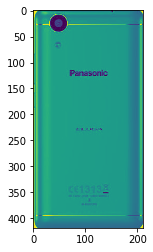

In [2]:
img_template=cv2.imread('panasonic_template.jpeg',0)
plt.imshow(img_template)

In [3]:
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    height,width=frame.shape[:2]
    tlx=width//4
    tly=(height//2)+(height//4)
    btrx=(width-tlx)
    btry=(height//2)-(height//4)
    cv2.rectangle(frame,(tlx,tly),(btrx,btry),(255,0,0),3)
    cropped=frame[btry:tly,tlx:btrx]
    #frame=cv2.flip(frame,1)
    matches=orb_detector(cropped,img_template)
    output_string="matches "+str(matches)
    cv2.putText(frame,output_string,(50,450),cv2.FONT_HERSHEY_COMPLEX,2,(250,0,0),2)
    threshold=100
    if matches>threshold:
        cv2.rectangle(frame,(tlx,tly),(btrx,btry),(0,255,0),3)
        cv2.putText(frame,output_string,(50,45),cv2.FONT_HERSHEY_COMPLEX,2,(250,25,0),2)
    
    cv2.imshow("image detection using orb",frame)
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# HOG 

In [15]:
gray=gray_shape
cell_size=(2,2)
block_size=(10,10)
nbins=5
hog=cv2.HOGDescriptor(_winSize=(gray.shape[1]//cell_size[1]*cell_size[1],\
                               gray.shape[0]//cell_size[0]*cell_size[0]),
                      _blockSize=(block_size[1]*cell_size[1],block_size[0]*cell_size[0])
                      ,_blockStride=cell_size,_cellSize=cell_size,_nbins=nbins)
n_cells=(gray.shape[0]//cell_size[0],gray.shape[1]//cell_size[1])
hog_feats=hog.compute(gray).reshape(n_cells[1]-block_size[1]+1,n_cells[0]-block_size[0]+1,\
                    block_size[0],block_size[1],nbins).transpose((1,0,2,3,4))


In [16]:
gradients=np.zeros((n_cells[0],n_cells[1],nbins))
cell_count=np.full((n_cells[0],n_cells[1],1),0,dtype=int)
for o in range(block_size[0]):
    for p in range(block_size[1]):
        gradients[o:n_cells[0]-block_size[0]+o+1,p:n_cells[1]-block_size[1]+p+1]+=\
        hog_feats[:,:,o,p,:]
        cell_count[o:n_cells[0]-block_size[0]+o+1,\
                  p:n_cells[1]-block_size[1]+p+1]+=1

gradients/=cell_count

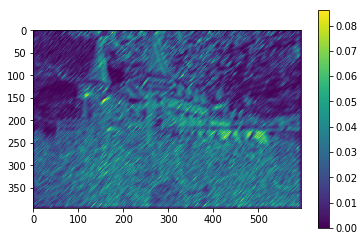

In [17]:
color_bins=4
plt.pcolor(gradients[:,:,color_bins])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal',adjustable='box')
plt.colorbar()
plt.ion()
plt.show()
#cv2.destroyAllWindows()